In [1]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR

gold = yf.download('GC=F ', '2022-03-01', '2024-03-01', auto_adjust=True)

print(gold)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706

[504 ro

In [2]:
# Tính trung bình của high và low
gold['mean_day'] = (gold['High'] + gold['Low']) / 2

# In ra một số dòng đầu của DataFrame để kiểm tra
print(gold.head())


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   

               mean_day  
Date                     
2022-03-01  1923.100037  
2022-03-02  1934.000000  
2022-03-03  1932.550049  
2022-03-04  1953.250000  
2022-03-07  1982.049988  


18:17:49 - cmdstanpy - INFO - Chain [1] start processing
18:17:49 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat
559 2024-04-25  2083.573159
560 2024-04-26  2082.551906
561 2024-04-27  2071.776119
562 2024-04-28  2069.191168
563 2024-04-29  2072.269978


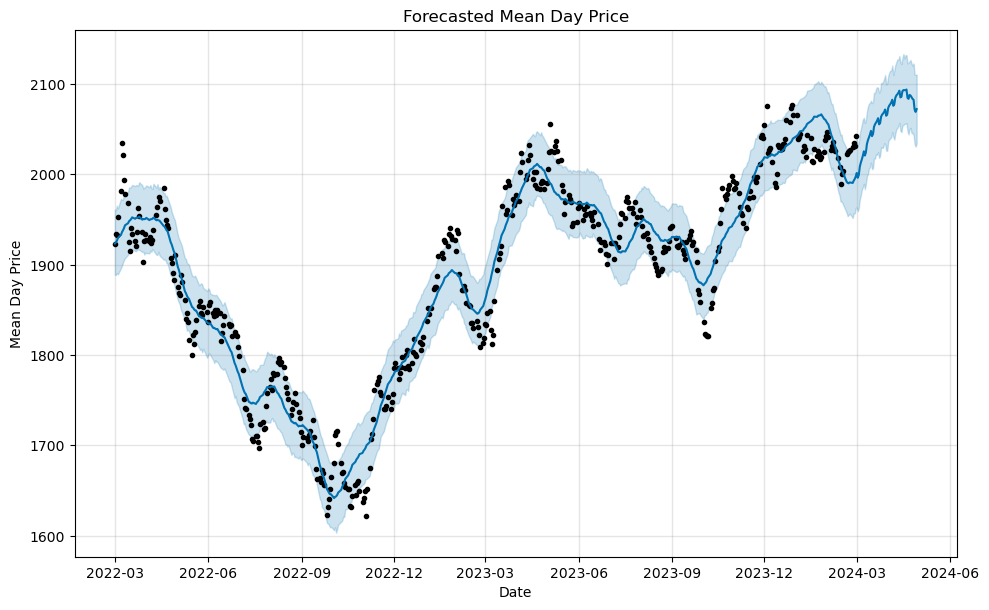

In [5]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu cho Prophet
gold_prophet = gold.reset_index()[['Date', 'mean_day']]
gold_prophet.columns = ['ds', 'y']

# Tạo và fit mô hình Prophet
model = Prophet()
model.fit(gold_prophet)

# Dự báo giá trung bình trong tương lai
future = model.make_future_dataframe(periods=60)  # Dự báo 60 ngày tiếp theo
forecast = model.predict(future)

# In ra dự báo cho 5 dòng cuối cùng
print(forecast[['ds', 'yhat']].tail())

# Vẽ biểu đồ dự báo
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Mean Day Price')
plt.title('Forecasted Mean Day Price')
plt.show()
